In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm

In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\taraka pavan sriram\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
df1 = pd.read_csv('Taiwain_integrated_da.csv')

In [3]:
df2 = pd.read_csv('USA_integrated_data.csv')

In [4]:
df2.shape

(92845, 15)

In [5]:
df1.shape

(6819, 13)

In [6]:
df1

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,BK
0,0.880352,0.228813,0.002259,0.505180,0.848195,0.026984,0.086957,0.999016,0.840402,0.112310,4.980000e+09,0.022102,1.0
1,0.922287,0.208944,0.006016,0.464291,0.848088,0.026984,0.064468,0.999018,0.839969,0.174045,6.110000e+09,0.022080,1.0
2,1.037018,0.225628,0.011543,0.503822,0.848094,0.026984,0.014993,0.999026,0.841218,0.025855,7.280000e+09,0.022138,1.0
3,0.877219,0.224323,0.004194,0.505566,0.848005,0.026697,0.089955,0.999004,0.840402,1.774027,4.880000e+09,0.022046,1.0
4,0.858332,0.212537,0.006022,0.465022,0.848037,0.026984,0.175412,0.999016,0.839973,2.028921,5.510000e+09,0.022096,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.942388,0.216602,0.010451,0.493687,0.848030,0.027064,0.103448,0.998992,0.840359,-0.075697,7.070000e+09,0.022138,0.0
6815,0.892640,0.216697,0.009259,0.475162,0.848037,0.027009,0.103448,0.998992,0.840306,-0.300213,5.220000e+09,0.022159,0.0
6816,0.904986,0.210929,0.025836,0.472725,0.847978,0.026791,0.106447,0.998984,0.840138,1.774027,5.990000e+09,0.022068,0.0
6817,0.919319,0.228326,0.012782,0.506264,0.847980,0.026822,0.109445,0.999018,0.841084,0.126140,7.250000e+09,0.022138,0.0


#### Integration

In [7]:
df1.shape

(6819, 13)

In [8]:
df1.columns

Index(['Tobin's Q', 'EPS', 'Liquidity', 'Profitability', 'Productivity',
       'Leverage Ratio', 'Asset Turnover', 'Operational Margin',
       'Return on Equity', 'Market Book Ratio', 'Assets Growth',
       'Sales Growth', 'BK'],
      dtype='object')

In [9]:
df2.shape

(92845, 15)

In [10]:
df2.columns

Index(['Data Year - Fiscal', 'Tobin's Q', 'EPS', 'Liquidity', 'Profitability',
       'Productivity', 'Leverage Ratio', 'Asset Turnover',
       'Operational Margin', 'Return on Equity', 'Market Book Ratio',
       'Assets Growth', 'Sales Growth', 'Employee Growth', 'BK'],
      dtype='object')

In [11]:
df2.drop(['Data Year - Fiscal','Employee Growth'],axis=1,inplace=True)

In [12]:
df2.columns


Index(['Tobin's Q', 'EPS', 'Liquidity', 'Profitability', 'Productivity',
       'Leverage Ratio', 'Asset Turnover', 'Operational Margin',
       'Return on Equity', 'Market Book Ratio', 'Assets Growth',
       'Sales Growth', 'BK'],
      dtype='object')

In [13]:
df = pd.concat([df1,df2],axis=0)

In [14]:
df

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,BK
0,0.880352,0.228813,0.002259,0.505180,0.848195,0.026984,0.086957,0.999016,0.840402,0.112310,4.980000e+09,0.022102,1.0
1,0.922287,0.208944,0.006016,0.464291,0.848088,0.026984,0.064468,0.999018,0.839969,0.174045,6.110000e+09,0.022080,1.0
2,1.037018,0.225628,0.011543,0.503822,0.848094,0.026984,0.014993,0.999026,0.841218,0.025855,7.280000e+09,0.022138,1.0
3,0.877219,0.224323,0.004194,0.505566,0.848005,0.026697,0.089955,0.999004,0.840402,1.774027,4.880000e+09,0.022046,1.0
4,0.858332,0.212537,0.006022,0.465022,0.848037,0.026984,0.175412,0.999016,0.839973,2.028921,5.510000e+09,0.022096,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92840,1.520923,-1.488171,-0.015494,-0.758859,-0.056905,1.345005,0.174115,-0.326823,-0.283168,-1.846719,-7.328654e-02,0.327312,0.0
92841,1.988495,-1.807630,0.093838,-1.204734,-0.121122,1.345005,0.215844,-0.270563,-0.283168,-2.474549,-2.018347e-01,-0.010544,0.0
92842,0.923868,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.283168,347.810044,-1.680005e-01,-0.020206,0.0
92843,0.787787,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,7.693645e-02,-0.170928,0.0


In [15]:
df.shape

(99664, 13)

In [16]:
df['BK'].value_counts()

0.0    98886
1.0      778
Name: BK, dtype: int64

<AxesSubplot:xlabel='BK', ylabel='count'>

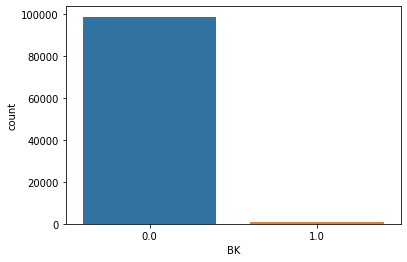

In [17]:
sns.countplot(x='BK', data=df)

In [18]:
#SMOTE

In [19]:
X=df.drop(labels=['BK'], axis=1)
y=df['BK']


In [20]:
oversample = SMOTE()
X,y=oversample.fit_resample(X,y)

<AxesSubplot:xlabel='BK', ylabel='count'>

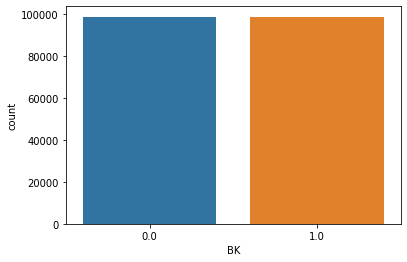

In [21]:
sns.countplot(x=y)

In [22]:
X.shape

(197772, 12)

In [23]:
X

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth
0,0.880352,0.228813,0.002259,0.505180,0.848195,0.026984,0.086957,0.999016,0.840402,0.112310,4.980000e+09,0.022102
1,0.922287,0.208944,0.006016,0.464291,0.848088,0.026984,0.064468,0.999018,0.839969,0.174045,6.110000e+09,0.022080
2,1.037018,0.225628,0.011543,0.503822,0.848094,0.026984,0.014993,0.999026,0.841218,0.025855,7.280000e+09,0.022138
3,0.877219,0.224323,0.004194,0.505566,0.848005,0.026697,0.089955,0.999004,0.840402,1.774027,4.880000e+09,0.022046
4,0.858332,0.212537,0.006022,0.465022,0.848037,0.026984,0.175412,0.999016,0.839973,2.028921,5.510000e+09,0.022096
...,...,...,...,...,...,...,...,...,...,...,...,...
197767,0.955903,0.219309,0.006186,0.478350,0.847993,0.026919,0.033096,0.999011,0.840221,-0.234207,5.693850e+09,0.022060
197768,1.102775,-1.770432,0.164507,-0.261323,-0.223756,0.525276,0.763984,-0.120991,-0.286444,4.478521,2.633540e-02,0.233340
197769,1.083286,0.251089,0.082520,0.056665,0.056408,0.777292,1.297372,0.037050,0.038798,4.913006,1.983300e-01,0.419368
197770,2.136799,-0.232164,-0.104605,-0.931183,-0.289176,1.345005,0.986349,-0.332768,-0.118144,347.810044,3.889048e-01,0.085466


In [24]:
##NOrmalization

In [25]:
from sklearn.preprocessing import MinMaxScaler
normal_scaling = MinMaxScaler()
normalized_data = normal_scaling.fit_transform(X)
normalized_data

array([[2.29391041e-01, 4.85706488e-01, 3.39896297e-01, ...,
        3.62765076e-01, 4.98498499e-01, 4.34629568e-01],
       [2.40434581e-01, 4.82208439e-01, 3.42658975e-01, ...,
        3.62832507e-01, 6.11611612e-01, 4.34606246e-01],
       [2.70648217e-01, 4.85145790e-01, 3.46722466e-01, ...,
        3.62670644e-01, 7.28728729e-01, 4.34667263e-01],
       ...,
       [2.82832743e-01, 4.89628379e-01, 3.98911843e-01, ...,
        3.68008701e-01, 6.09446642e-11, 8.53689949e-01],
       [5.60269495e-01, 4.04548620e-01, 2.61319752e-01, ...,
        7.42542619e-01, 8.00212229e-11, 5.01469233e-01],
       [2.45690219e-01, 4.84889028e-01, 3.42725368e-01, ...,
        3.63107380e-01, 5.97957753e-01, 4.34667263e-01]])

In [26]:
normalized_data_df = pd.DataFrame(normalized_data,columns = df.columns[0:12])

<Figure size 3200x2240 with 0 Axes>

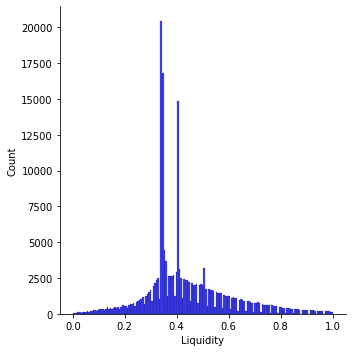

In [27]:
plt.figure(figsize=(40,28),dpi=80)
sns.displot(normalized_data_df["Liquidity"], color = 'blue', label = "Tobin's Q",kde = False)

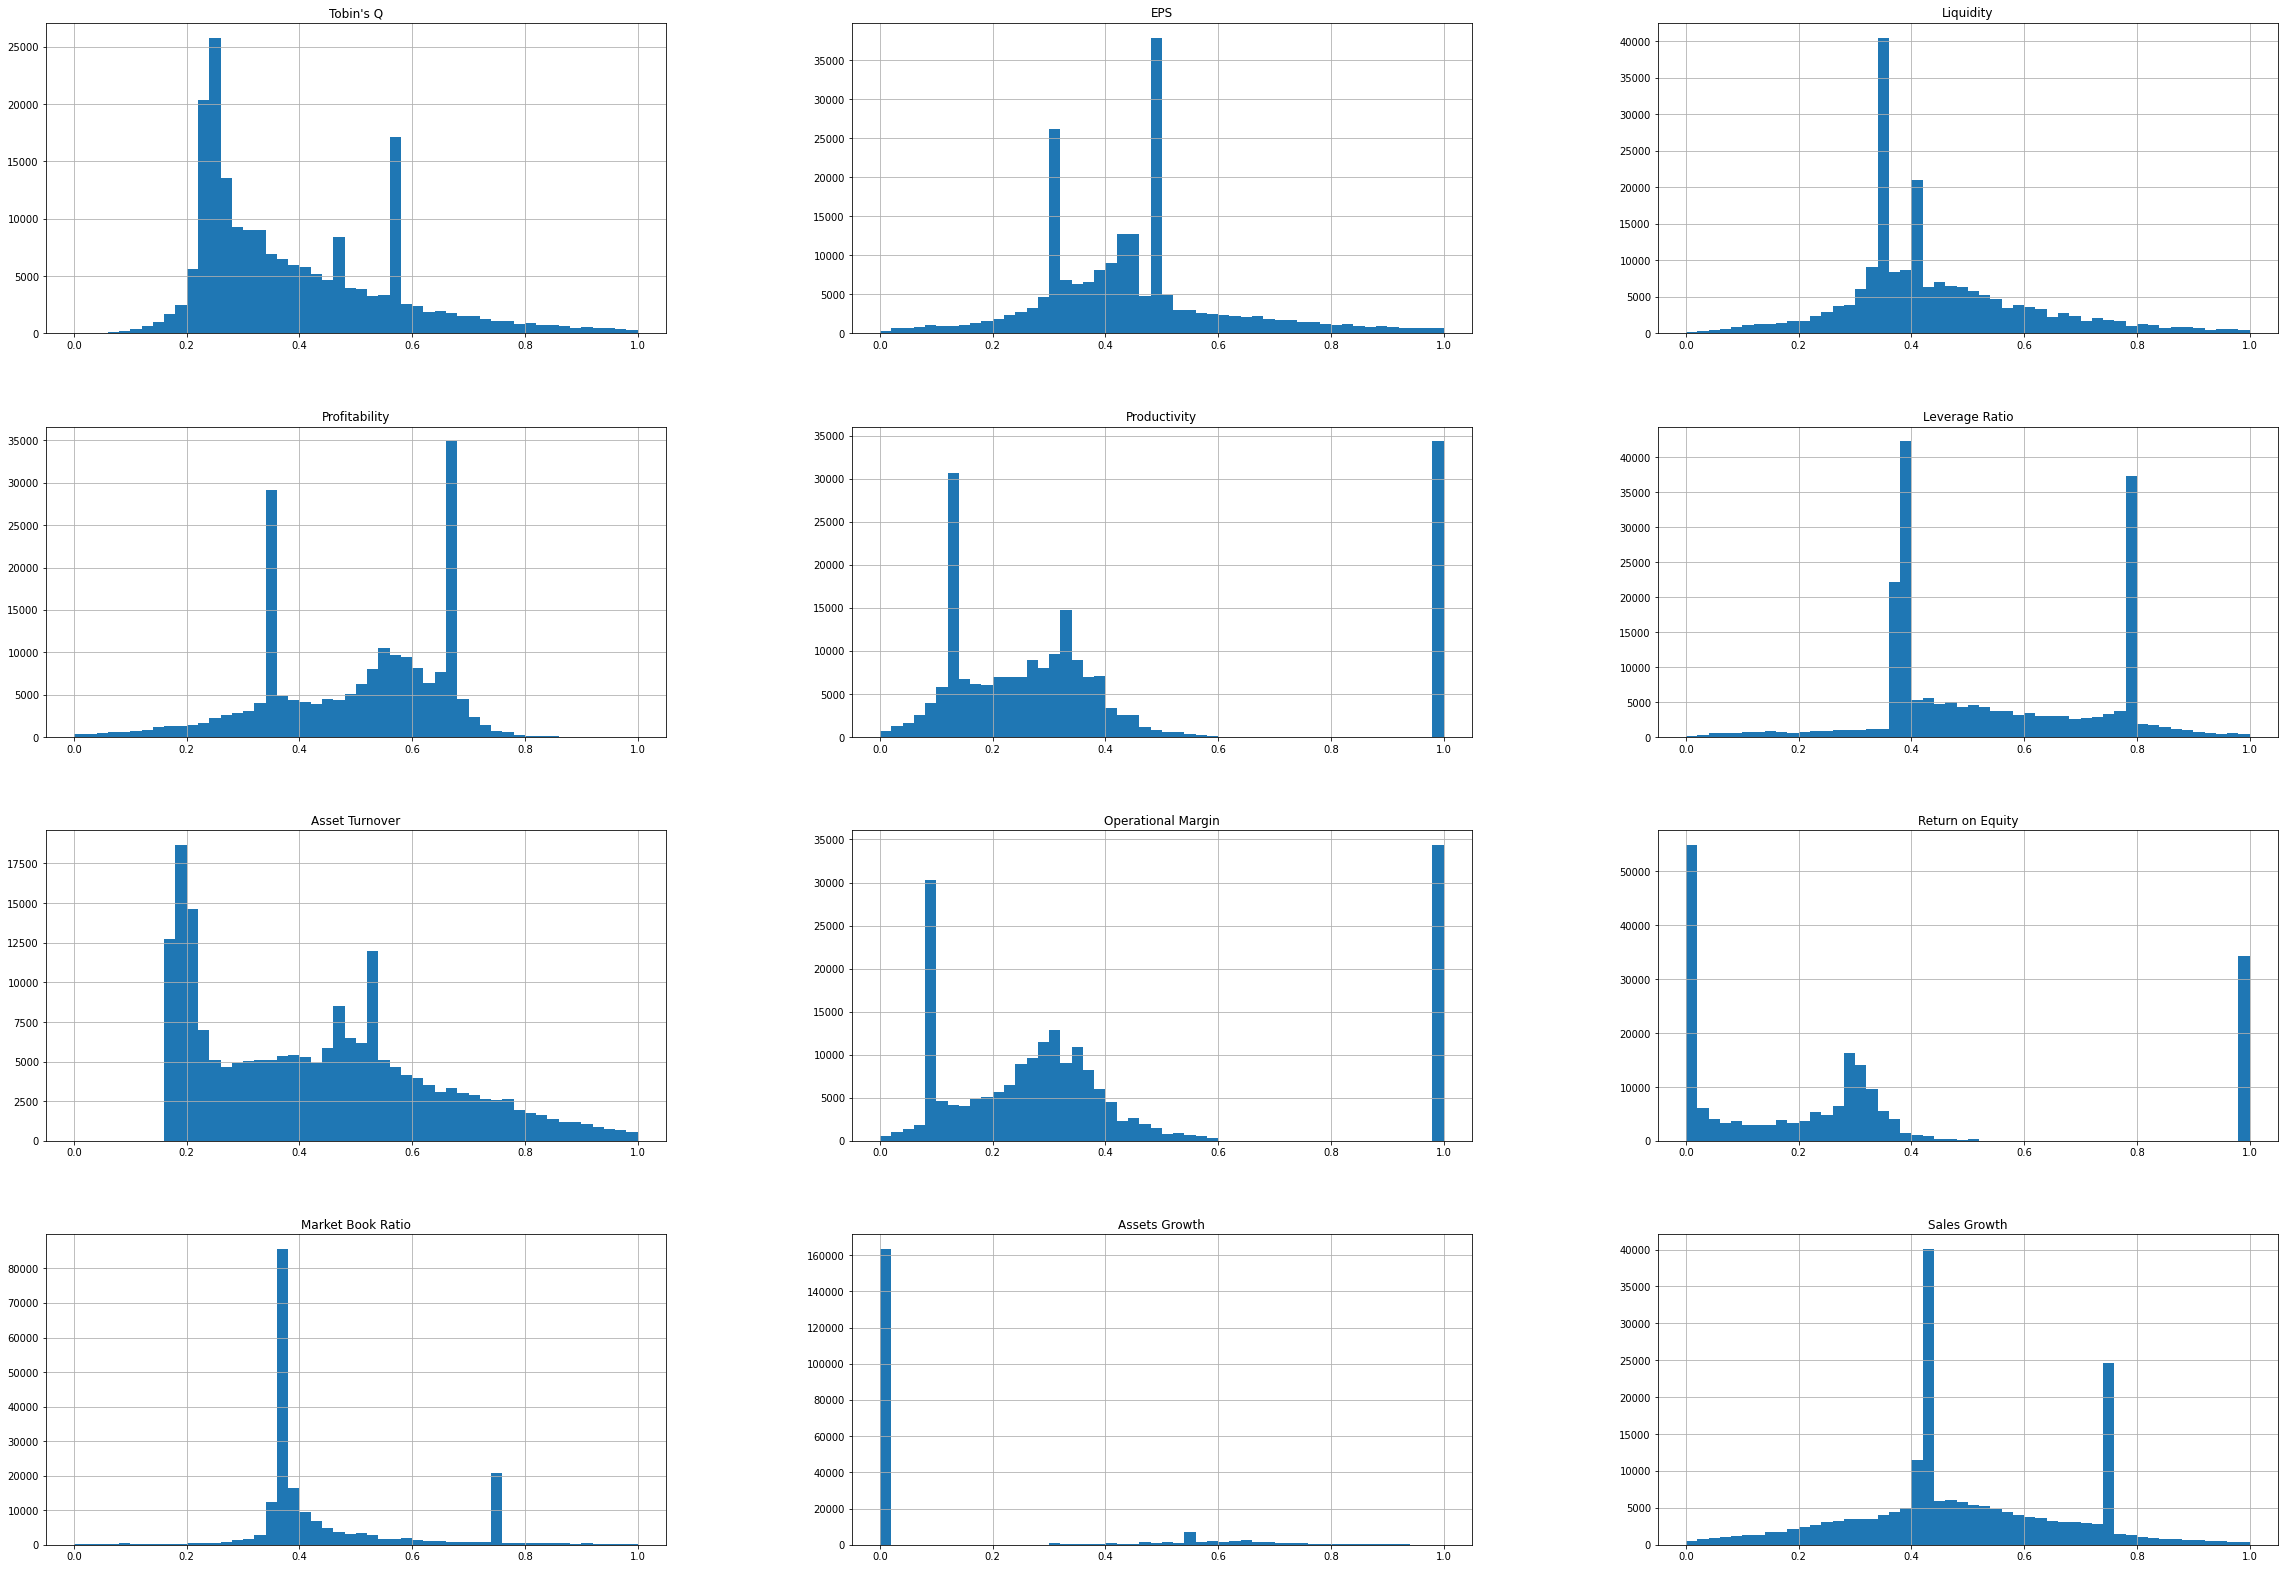

In [28]:
normalized_data_df.hist(figsize = (40,28), bins = 50)
plt.show()

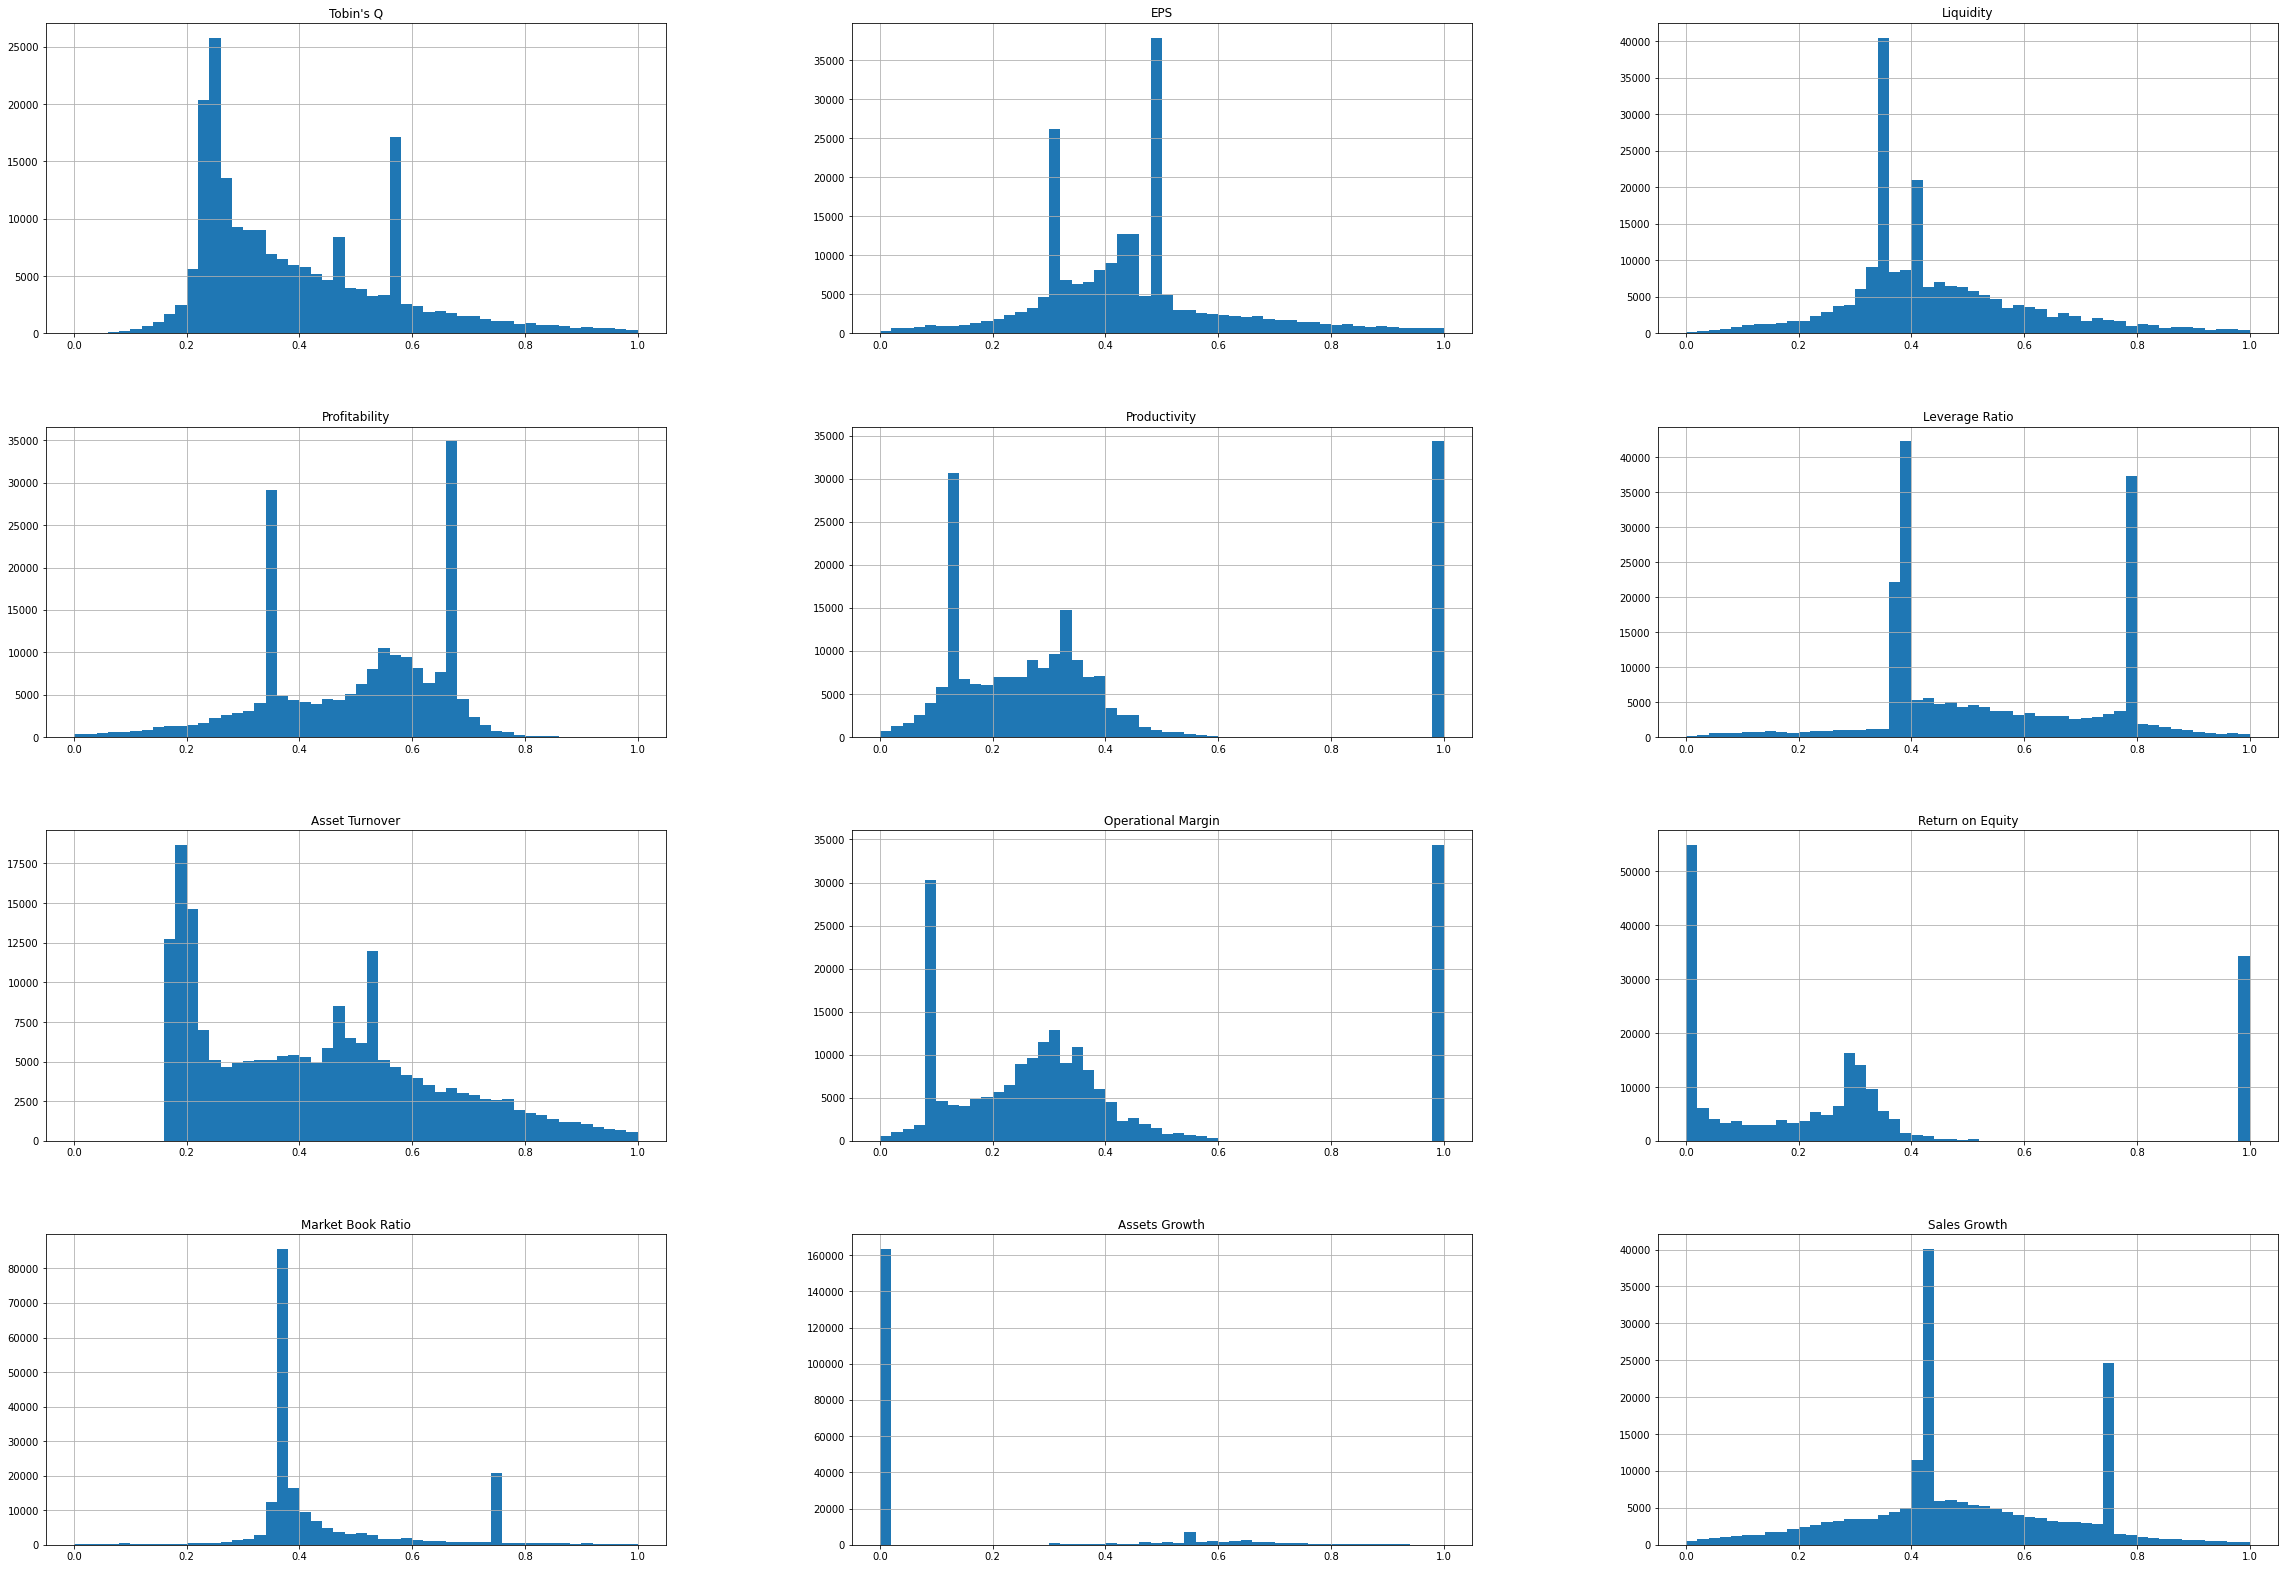

In [29]:
normalized_data_df.hist(figsize = (40,28), bins = 50)
plt.show()

In [30]:
##Standardization

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.95656604,  0.2700582 , -0.58042291, ..., -0.55203302,
         1.72769448, -0.31858968],
       [-0.89165697,  0.24868804, -0.5636055 , ..., -0.55158188,
         2.22104767, -0.31871321],
       [-0.71407451,  0.2666328 , -0.53886959, ..., -0.55266482,
         2.73186469, -0.31839001],
       ...,
       [-0.64245923,  0.29401768, -0.22117426, ..., -0.51695054,
        -0.44655233,  1.90116108],
       [ 0.98819193, -0.2257486 , -1.05874632, ...,  1.98886937,
        -0.44655233,  0.0354581 ],
       [-0.86076664,  0.2650642 , -0.56320135, ..., -0.54974284,
         2.16149511, -0.31839001]])

In [32]:
X_scaled.std()

1.0000000000000002

In [33]:
Standard_data_df = pd.DataFrame(X_scaled,columns = df.columns[0:12])

In [34]:
Standard_data_df.shape

(197772, 12)

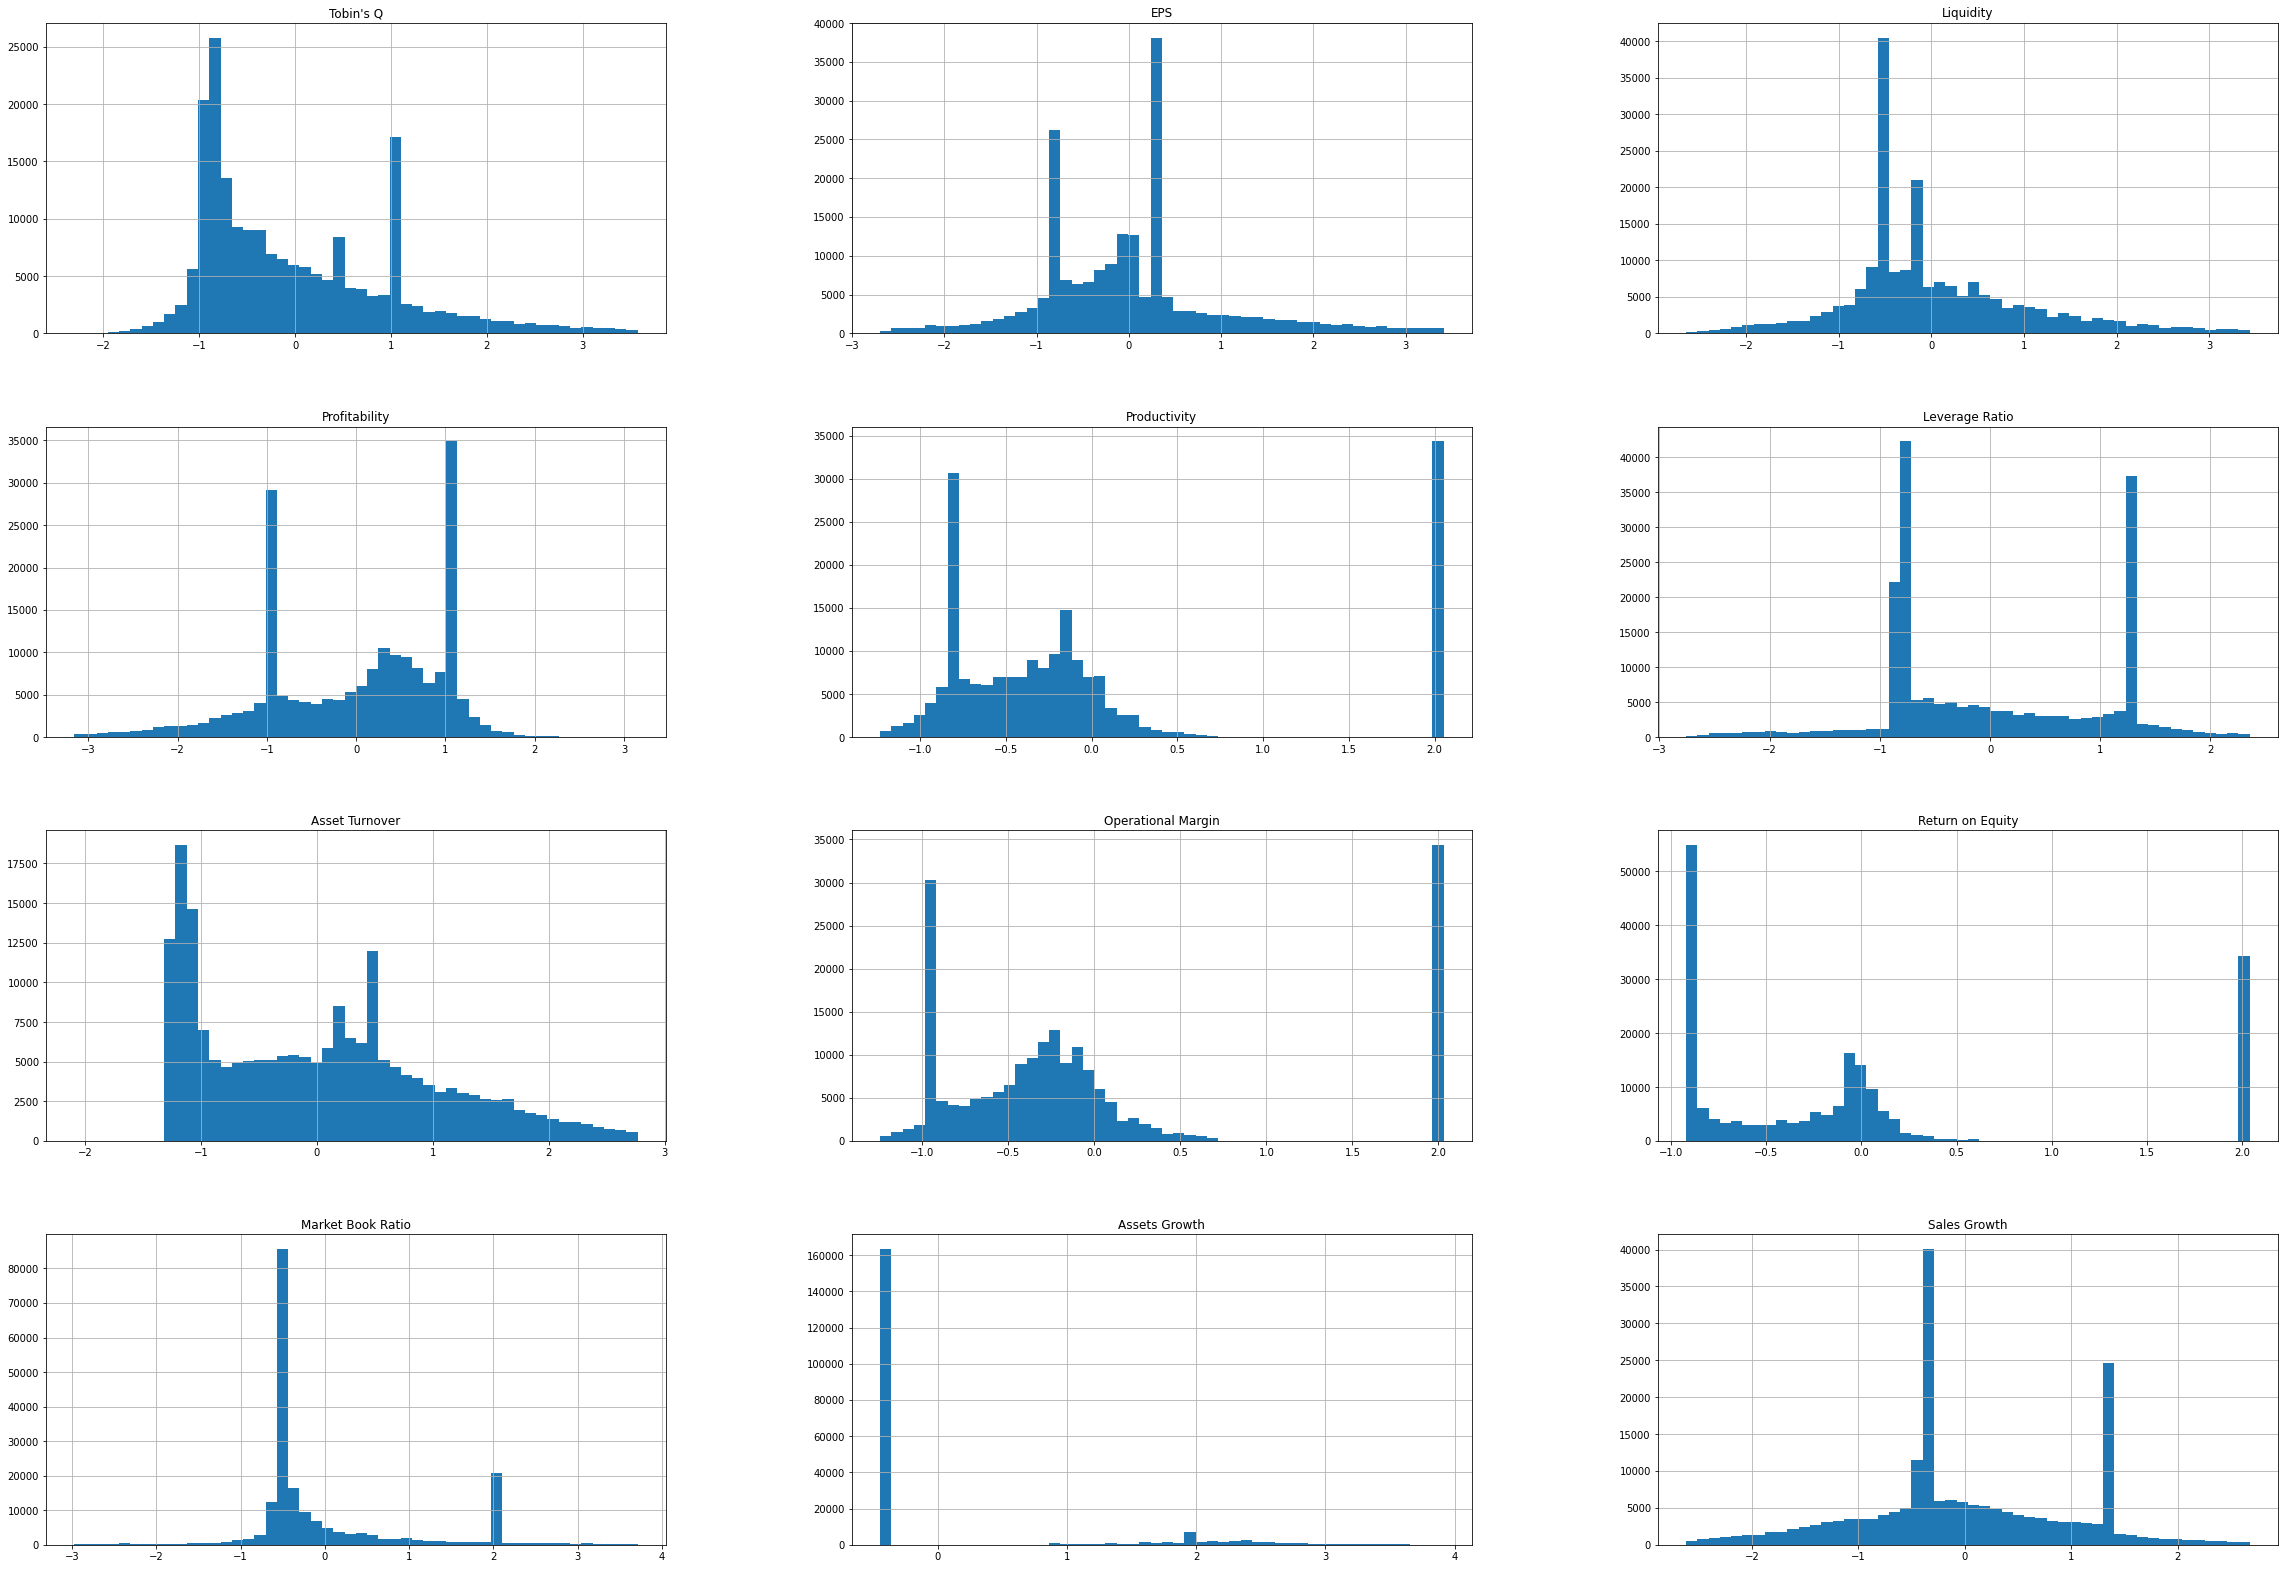

In [35]:
Standard_data_df.hist(figsize = (40,28), bins = 50)
plt.show()

PAir plot

In [36]:
ppp = pd.concat([Standard_data_df,y],axis=1)

In [37]:
ppp

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,BK
0,-0.956566,0.270058,-0.580423,1.106691,2.052399,-0.798736,-1.146855,2.030338,2.027358,-0.552033,1.727694,-0.318590,1.0
1,-0.891657,0.248688,-0.563606,1.039459,2.052096,-0.798736,-1.183882,2.030342,2.026244,-0.551582,2.221048,-0.318713,1.0
2,-0.714075,0.266633,-0.538870,1.104460,2.052113,-0.798736,-1.265342,2.030362,2.029459,-0.552665,2.731865,-0.318390,1.0
3,-0.961415,0.265229,-0.571761,1.107326,2.051863,-0.799184,-1.141918,2.030310,2.027358,-0.539890,1.684035,-0.318904,1.0
4,-0.990649,0.252552,-0.563578,1.040662,2.051952,-0.798736,-1.001215,2.030338,2.026253,-0.538027,1.959090,-0.318625,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197767,-0.839626,0.259837,-0.562847,1.062576,2.051828,-0.798837,-1.235535,2.030326,2.026891,-0.554565,2.039358,-0.318824,1.0
197768,-0.612294,-1.880244,0.145799,-0.153641,-0.976030,-0.021846,-0.032147,-0.602804,-0.873111,-0.520126,-0.446552,0.861716,1.0
197769,-0.642459,0.294018,-0.221174,0.369214,-0.184523,0.371072,0.846062,-0.231249,-0.035948,-0.516951,-0.446552,1.901161,1.0
197770,0.988192,-0.225749,-1.058746,-1.255067,-1.160849,1.256197,0.333970,-1.100694,-0.439911,1.988869,-0.446552,0.035458,1.0


In [38]:
# sns.pairplot(ppp[5:-1],hue='BK')

In [39]:
# X = df.drop(['BK'],axis=1)

In [40]:
# y = df['BK']

In [41]:
X.shape

(197772, 12)

In [42]:
y.shape

(197772,)

In [43]:
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_scaled)

In [44]:
print("Shape after PCA",X_pca.shape)

Shape after PCA (197772, 12)


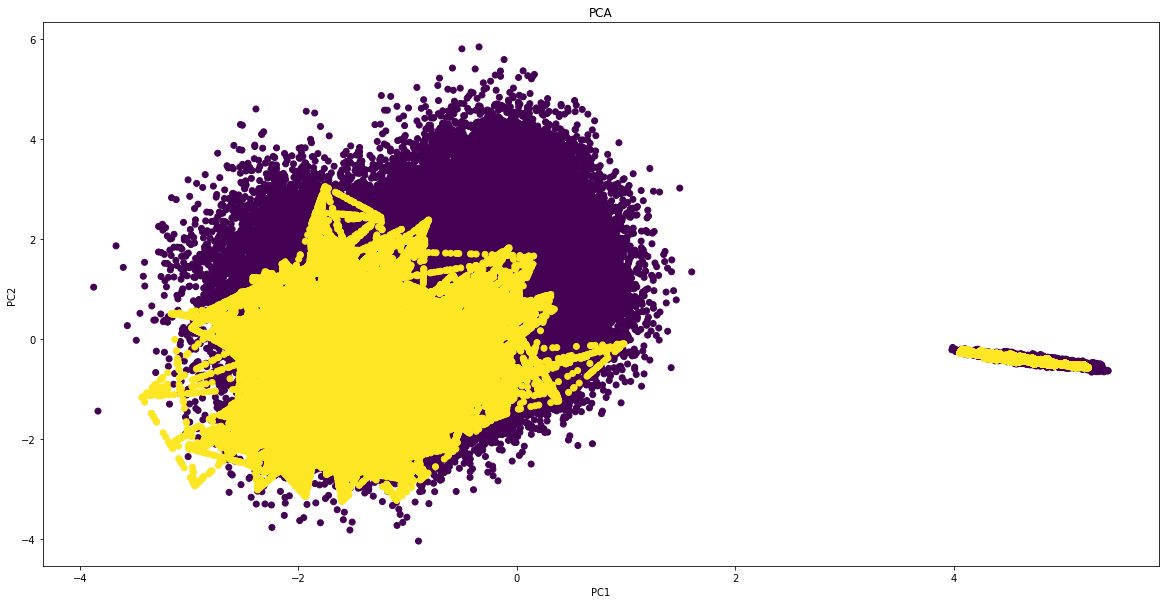

In [45]:
plt.figure(figsize=(20,10))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.show()

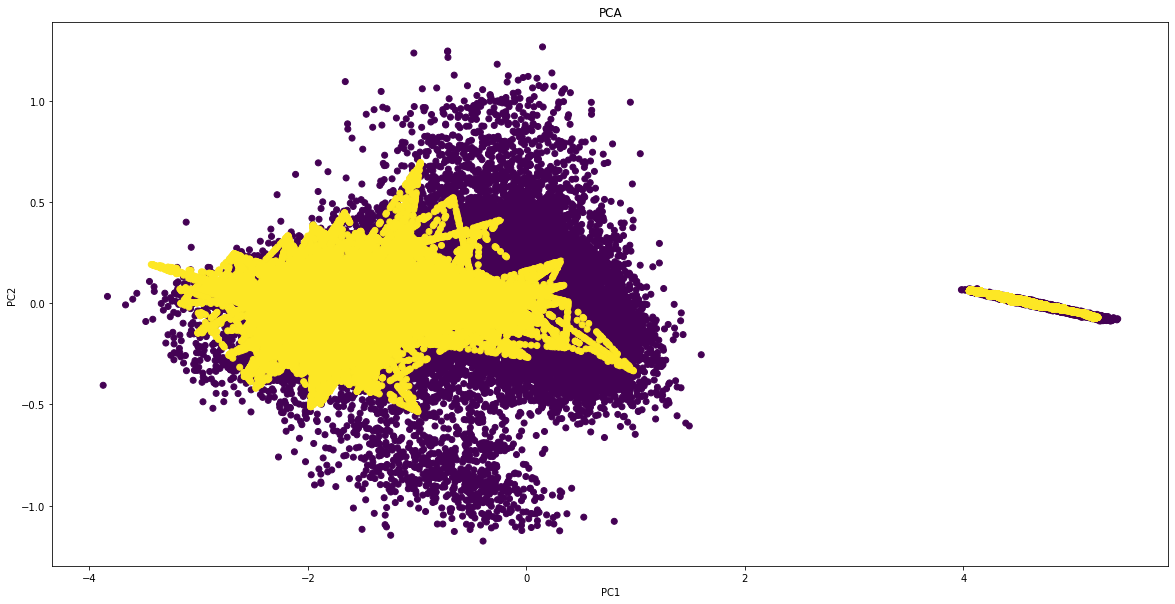

In [46]:
plt.figure(figsize=(20,10))
plt.scatter(X_pca[:,0],X_pca[:,-1],c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.show()

In [47]:
X_pca.shape

(197772, 12)

In [48]:
df_pca = pd.DataFrame(X_pca, columns = ['Column_A','Column_B','Column_C','Column_D','Column_E','Column_F','Column_G','Column_H','Column_I','Column_J','Column_K','Column_L'])

In [49]:
df_pca

,Column_A,Column_B,Column_C,Column_D,Column_E,Column_F,Column_G,Column_H,Column_I,Column_J,Column_K,Column_L
0,4.469502,-0.395084,0.327002,0.042843,0.003887,0.016210,-0.086032,-0.003705,0.040036,-0.286522,0.074621,0.023701
1,4.642037,-0.440810,0.489832,0.056104,0.026079,0.041272,-0.192229,0.095107,0.167858,0.099187,-0.014265,0.000868
2,4.857070,-0.394123,0.645915,0.080056,0.068951,0.091963,-0.308721,0.247065,0.161462,0.523736,-0.108201,-0.026429
3,4.448834,-0.385459,0.316463,0.040134,0.006691,0.004369,-0.085750,-0.014642,0.035627,-0.321359,0.082271,0.025513
4,4.512335,-0.444746,0.315130,-0.002522,-0.000420,0.068024,-0.197786,-0.025402,0.196096,-0.104563,0.038453,0.012309
...,...,...,...,...,...,...,...,...,...,...,...,...
197767,4.577114,-0.390557,0.489055,0.069742,0.035219,0.033687,-0.144211,0.114706,0.080718,-0.044847,0.015660,0.008766
197768,-1.453261,-1.140617,0.660330,-0.220116,-1.160137,-0.827150,-0.435609,-0.822022,-0.610341,0.089978,-0.088848,-0.256681
197769,-0.394590,0.156320,-0.872131,0.452807,-2.015248,0.397246,-0.088643,-0.535740,0.027223,-0.064061,0.206544,-0.025213
197770,-2.371520,0.179229,0.125883,2.026463,1.226189,0.202481,-0.454921,-0.056608,0.618118,0.408523,0.459574,-0.169071


In [50]:
final = pd.concat([df_pca,y],axis=1)

In [51]:
from sklearn.model_selection import train_test_split
X_trai, X_test, y_trai,y_test = train_test_split(df_pca,y,test_size=0.2,random_state = 42)

In [52]:
X_train, X_val, y_train,y_val = train_test_split(X_trai,y_trai,test_size=0.2,random_state = 42)

In [53]:
X_val.shape

(31644, 12)

## Randomized Search CSV

In [54]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10,1000,10)]
min_samples_split = [1,3,4,5,7,8,9]
min_samples_leaf = [1,2,4,6,8]
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth': max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 3, 4, 5, 7, 8, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


## Random Forest

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
from sklearn.ensemble import RandomForestClassifier
random_classifier = RandomForestClassifier()
rf_randomized = RandomizedSearchCV(estimator=random_classifier,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,random_state=100,n_jobs=-1)
rf_randomized.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: 

In [ ]:
# random_classifier.fit(X_train,y_train)
rf_randomized.best_params_

In [ ]:
rf_randomized.best_estimator_

In [ ]:
best_random_grid = rf_randomized.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred = best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion':[rf_randomized.best_params_['criterion']],
    'max_depth' :[rf_randomized.best_params_['max_depth']],
    'max_features':[rf_randomized.best_params_['max_features']],
    'min_samples_leaf':[rf_randomized.best_params_['min_samples_leaf'],
                       rf_randomized.best_params_['min_samples_leaf']+2,
                       rf_randomized.best_params_['min_samples_leaf']+4],
    'min_samples_split':[rf_randomized.best_params_['min_samples_split']-2,
                         rf_randomized.best_params_['min_samples_split']-1,
                         rf_randomized.best_params_['min_samples_split'],
                         rf_randomized.best_params_['min_samples_split']+2,
                         rf_randomized.best_params_['min_samples_split']+1],
    'n_estimators':[rf_randomized.best_params_['n_estimators']-200,rf_randomized.best_params_['n_estimators']-100,
                  rf_randomized.best_params_['n_estimators'],rf_randomized.best_params_['n_estimators']+200
                  ,rf_randomized.best_params_['n_estimators']+100]
}
print(param_grid)

In [ ]:
#Grid Search
rf = RandomForestClassifier()
grid_search=GridSearchCV(estimator = rf,param_grid=param_grid,cv=2,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
best_grid

In [ ]:
#optional
from sklearn.ensemble import RandomForestClassifier
xx = RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_split=5, n_estimators=300)

In [ ]:
xx.fit(X_train,y_train)

In [ ]:
y_pred = xx.predict(X_test)
# RandomForestClassifier(criterion='entropy', max_depth=560,10-92%, max_features='sqrt',
#                        min_samples_split=5, n_estimators=300)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('Accuracy Score {}'.format(accuracy_score(y_test,y_pred)))
print('Classification reportL {}'.format(classification_report(y_test,y_pred)))

In [ ]:
accuracy_score(xx.predict(X_train),y_train)
#accuracy_score(Y_trainn, xgb.predict(X_trainn))

In [ ]:
#optional ends

In [ ]:
#Accuracy score, Classification report

In [ ]:
y_pred = best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('Accuracy Score {}'.format(accuracy_score(y_test,y_pred)))
print('Classification reportL {}'.format(classification_report(y_test,y_pred)))

In [ ]:
accuracy_score(y_train,best_grid.predict(x_train))

In [ ]:
#over

In [ ]:
y_pred = random_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

In [ ]:
# random_classifier.score(X_test,y_test)

## KNN

In [135]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
kk = KNeighborsClassifier(n_neighbors=5, p=2, metric="minkowski")
kk.fit(X_train,y_train)

KNeighborsClassifier()

In [136]:
y_pred = kk.predict(X_test)
# kk.score(X_test,y_test)
cm = confusion_matrix(y_pred, y_test)
print(cm)
accuracy_score(y_pred,y_test)

[[17954    21]
 [ 1774 19806]]


0.9546201491593983

In [137]:
print("Accuracy",accuracy_score(y_test,y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy 0.9546201491593983
Precision: 0.918
Recall: 0.999
Accuracy: 0.955
F1 Score: 0.957


##Logistic Regressor

In [68]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)


In [69]:
LR.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [70]:
y_pred = LR.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred, y_test)
print(cm)
accuracy_score(y_pred,y_test)

[[15253  2726]
 [ 4475 17101]]


0.8179496903046392

### Naive Bayes

In [89]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [90]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [91]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

In [92]:
print(ac)

0.7920616862596385


In [93]:
print(cm)

[[16248  3480]
 [ 4745 15082]]


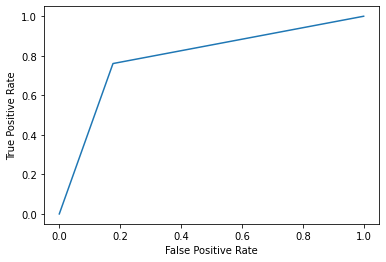

In [94]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

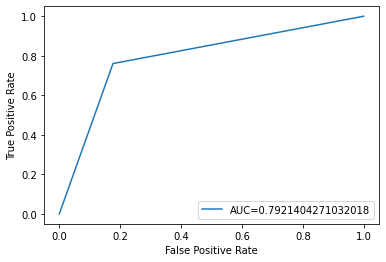

In [95]:
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [64]:

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.813
Recall: 0.761
Accuracy: 0.792
F1 Score: 0.786


In [65]:
rf_randomized = RandomizedSearchCV(estimator=classifier,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,random_state=100,n_jobs=-1)
rf_randomized.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


ValueError: Invalid parameter n_estimators for estimator GaussianNB(). Check the list of available parameters with `estimator.get_params().keys()`.

In [95]:
y_pred = best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[18968   760]
 [   60 19767]]
Accuracy Score 0.9792693717608394
Classification report:               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     19728
         1.0       0.96      1.00      0.98     19827

    accuracy                           0.98     39555
   macro avg       0.98      0.98      0.98     39555
weighted avg       0.98      0.98      0.98     39555



In [69]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [67]:

kfold = model_selection.KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 50
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

KeyboardInterrupt: 

In [70]:
estimators = []
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = GaussianNB()
estimators.append(('naivebayes', model3))
model4 = KNeighborsClassifier(n_neighbors=5, p=2, metric="minkowski")
estimators.append(('K-NN', model4))
# create the ensemble model
ensemble = VotingClassifier(estimators)
#results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=5)
em=ensemble.fit(X_train,y_train)
pred=em.predict(X_test)
print(confusion_matrix(y_test, pred))


#print(results.mean())

[[18253  1475]
 [  233 19594]]


In [71]:
y_pred=pred
print("Accuracy",accuracy_score(y_test,y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy 0.9568196182530654
Precision: 0.930
Recall: 0.988
Accuracy: 0.957
F1 Score: 0.958


In [72]:
print(results)

NameError: name 'results' is not defined

In [76]:
import matplotlib.pyplot as plt
from sklearn import metrics

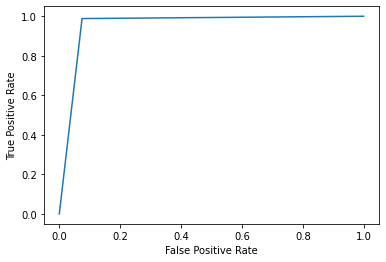

In [83]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

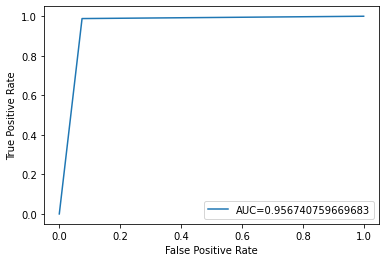

In [84]:
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()